## Read the dataset

In [1]:
import pandas as pd
data=pd.read_csv("Downloads//dataset - netflix1.csv")
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


### Exploratory Data Analysis

In [2]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


### Removing outliers

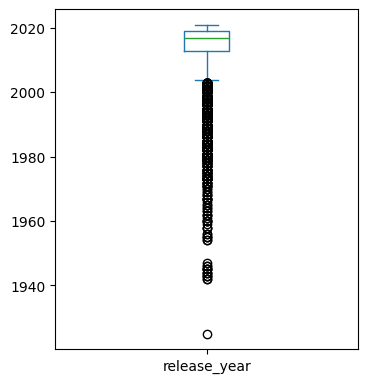

In [4]:
import matplotlib.pyplot as plt
data.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (3,4))
plt.show()

<Axes: >

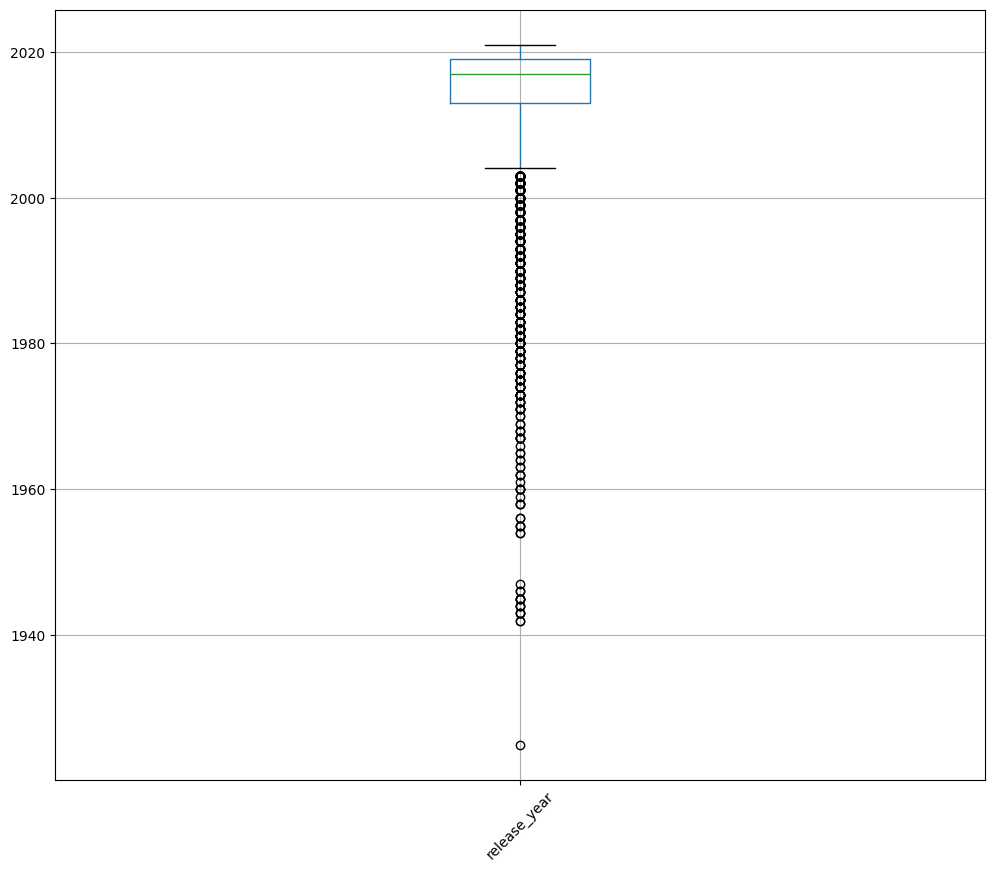

In [5]:
plt.figure(figsize=(12,10))
data.boxplot(rot=45)

In [6]:
import numpy as np
def outlier_limits(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL, LL
for column in data.columns:
    if data[column].dtype != 'object':
        UL, LL = outlier_limits(data[column])
        data[column] = np.where((data[column] > UL) ,UL , np.where((data[column] < LL),LL, data[column]))

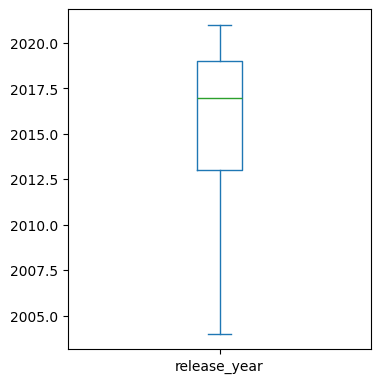

In [7]:
data.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (3,4))
plt.show()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8790 non-null   object 
 1   type          8790 non-null   object 
 2   title         8790 non-null   object 
 3   director      8790 non-null   object 
 4   country       8790 non-null   object 
 5   date_added    8790 non-null   object 
 6   release_year  8790 non-null   float64
 7   rating        8790 non-null   object 
 8   duration      8790 non-null   object 
 9   listed_in     8790 non-null   object 
dtypes: float64(1), object(9)
memory usage: 686.8+ KB
